t


In [204]:
import numpy as np
import pandas as pd

import sklearn.datasets as datasets

from sklearn.model_selection import train_test_split 
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS



In [205]:
df = pd.read_csv('../data/combined_cleaned.csv')

In [207]:
X = df['text']
y = df['label']


In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [209]:

# Define the words to exclude
custom_stop_words = [ 'i', 'people', 'know', 'feel', 'im', 'get', 'like', 'thing', 'similar', 'really', 'want', 'get', 
'also', 'new', 'think', 'year', 'dupe', 'one', 'help', 'time', 'dont', 'think', 'want', 'much', 'one', 'really', 'would', 'help', 'thought', 'year','day', 
'life', 'could', 'even', 'also', 'ive', 'go', 'make', 'something', 'way', 'see', 'going', 'say', 'anyone', 'could', 'take', 'got', 'much', 'someone', 'still', 
 'back', 'friend', 'lot', 'cant', 'med', 'started', 'need', 'month', 'since', 'never', 'good', 'even', 'anything', 'first', 'said', 'sometimes', 
'always', 'medication', 'bad', 'around', 'feeling', 'well', 'tell', 'work', 'diagnosed', 'diagnosis','today', 'everything', 'better', 'told', 'trying', 'guy', 'right', 
'person', 'else', 'ever', 'last', 'come', 'night', 'ago', 'doctor', 'made', 'sure', 'week', 'talking', 'everyone', 'away', 'getting', 'long', 'stop', 'keep', 
'taking','try', 'though', 'every', 'please', 'didnt', 'went', 'find', 'thinking', 'question', 'u','actually','thats','recently','may','two','maybe','some']

# Combine the custom stop words with the built-in English stop words
stop_words_list = list(ENGLISH_STOP_WORDS) + custom_stop_words

In [210]:
# Create a pipeline with TF-IDF vectorizer and random forest classifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', RandomForestClassifier(random_state=0))
])

# Define the parameter grid for grid search
param_grid = {
    

    'tfidf__max_features': [3000],
    'clf__n_estimators': [300],
   
}

# Perform grid search within the pipeline
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model and make predictions on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy)

Best Parameters: {'clf__n_estimators': 300, 'tfidf__max_features': 3000}
Accuracy: 0.8321479374110953


In [211]:
vectorizer = TfidfVectorizer(max_features=3000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [229]:
# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100)

# Train the classifier on the training data
clf.fit(X_train_tfidf, y_train)

# Make predictions on the training data
y_train_pred = clf.predict(X_train_tfidf)

# Make predictions on the test data
y_test_pred = clf.predict(X_test_tfidf)

# Calculate the accuracy scores
train_score = accuracy_score(y_train, y_train_pred)
test_score = accuracy_score(y_test, y_test_pred)

# Print the scores
print("Train Score:", train_score)
print("Test Score:", test_score)

Train Score: 0.9953753112771255
Test Score: 0.8250355618776671


Feature: 0, Importance Score: 0.00003
Feature: 1, Importance Score: 0.00060
Feature: 2, Importance Score: 0.00033
Feature: 3, Importance Score: 0.00085
Feature: 4, Importance Score: 0.00002
Feature: 5, Importance Score: 0.00010
Feature: 6, Importance Score: 0.00001
Feature: 7, Importance Score: 0.00003
Feature: 8, Importance Score: 0.00035
Feature: 9, Importance Score: 0.00001
Feature: 10, Importance Score: 0.00016
Feature: 11, Importance Score: 0.00001
Feature: 12, Importance Score: 0.00001
Feature: 13, Importance Score: 0.00006
Feature: 14, Importance Score: 0.00022
Feature: 15, Importance Score: 0.00011
Feature: 16, Importance Score: 0.00008
Feature: 17, Importance Score: 0.00005
Feature: 18, Importance Score: 0.00001
Feature: 19, Importance Score: 0.00000
Feature: 20, Importance Score: 0.00010
Feature: 21, Importance Score: 0.00006
Feature: 22, Importance Score: 0.00019
Feature: 23, Importance Score: 0.00000
Feature: 24, Importance Score: 0.00002
Feature: 25, Importance Score: 0.00

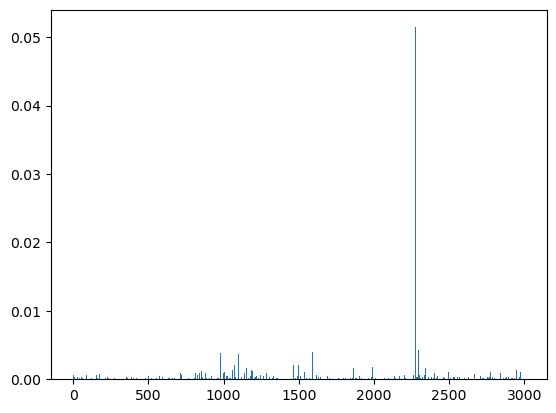

In [213]:
import matplotlib.pyplot as plt

importance = clf.feature_importances_

# Summarize feature importance
for i, v in enumerate(importance):
    print('Feature: %0d, Importance Score: %.5f' % (i, v))

# Plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [214]:
impor_df=pd.DataFrame(importance, columns = ['Feature'])




In [215]:
zero_features = (impor_df['Feature'] == 0).sum()
print("Number of features with importance value equal to 0:", zero_features)


Number of features with importance value equal to 0: 196


In [222]:
import numpy as np

# Get the indices of non-zero importance features
non_zero_indices = np.where(importance > 0.0002)[0]

# Update the training and test data matrices
X_train_selected = X_train_tfidf[:, non_zero_indices]
X_test_selected = X_test_tfidf[:, non_zero_indices]

# Retrain the model on the selected features
clf.fit(X_train_selected, y_train)

# Evaluate the model on the selected features
train_score = clf.score(X_train_selected, y_train)
test_score = clf.score(X_test_selected, y_test)

print("Train Score:", train_score)
print("Test Score:", test_score)

Train Score: 0.9953753112771255
Test Score: 0.8207681365576103


In [224]:
testdf = pd.read_csv('../data/test_20posts.csv')

In [226]:
testdf

,Index,Post title,Post text,Subreddit
0,1,Wish I could stop laughing,My inappropriate laughter is fucking me. It fu...,schizophrenia
1,2,Freakin out,I’m diagnosed with psychosis but I’ve been hea...,schizophrenia
2,3,Does anyone get only auditory hallucinations?,"Unlike my other friend that has schizophrenia,...",schizophrenia
3,4,"how do you keep going with work, chores, erran...",its all so difficult. i recently (in the past ...,schizophrenia
4,5,Need advice on schizophrenic mother,Hello!\n\nI hope I'm not breaking any rules an...,schizophrenia
5,6,God is forcing me to watch flashbacks of my ab...,God is forcing me to watch flashbacks of my ab...,schizophrenia
6,7,Another day,Need to get this Down. Need to hear it. Need t...,schizophrenia
7,8,Are there any parents here?,"I have schizophrenia, and I’m stable on meds. ...",schizophrenia
8,9,Do your hallusinations reply back to your thau...,For an example I was thinking about a fake sce...,schizophrenia
9,10,I'm trying to make it through,I can’t even put into words mentally where I’m...,schizophrenia


In [230]:
vectorizer.transform(testdf['Post text'])



<40x3000 sparse matrix of type '<class 'numpy.float64'>'
	with 1860 stored elements in Compressed Sparse Row format>

In [235]:
clf.predict(vectorizer.transform(testdf['Post text']))

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1])

In [237]:

16/20

0.8